In [49]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

In [50]:
yf.pdr_override()
end=dt.datetime.now()
start=dt.datetime(end.year-5,end.month,end.day)
Input=['MSFT','^GSPC']

In [51]:
df=reader.get_data_yahoo(Input, start, end)["Adj Close"]
df

[*********************100%%**********************]  2 of 2 completed


Ticker,MSFT,^GSPC
Date,,
2019-03-18,111.913986,2832.939941
2019-03-19,111.990143,2832.570068
2019-03-20,111.866386,2824.229980
2019-03-21,114.436508,2854.879883
2019-03-22,111.419006,2800.709961
...,...,...
2024-03-12,415.279999,5175.270020
2024-03-13,415.100006,5165.310059
2024-03-14,425.220001,5150.479980


In [53]:
mtl_ret=df.resample("M").ffill().pct_change()
mtl_ret=mtl_ret.dropna(axis=0)
mtl_ret.head(3)

Ticker,MSFT,^GSPC
Date,,
2019-04-30,0.107343,0.039313
2019-05-31,-0.049481,-0.065778
2019-06-30,0.083118,0.068930


In [54]:
X=mtl_ret["^GSPC"]
y=mtl_ret["MSFT"]

x_sm=sm.add_constant(X)

In [55]:
model=sm.OLS(y,x_sm)

In [56]:
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     72.24
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           8.96e-12
Time:                        21:18:56   Log-Likelihood:                 105.31
No. Observations:                  60   AIC:                            -206.6
Df Residuals:                      58   BIC:                            -202.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0139      0.006      2.476      0.016       0.003       0.025
^GSPC          0.8895      0.105      8.500      0.000       0.680       1.099
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.624
Skew:                           0.601   Prob(JB):                        0.163
Kurtosis:                       2.944   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

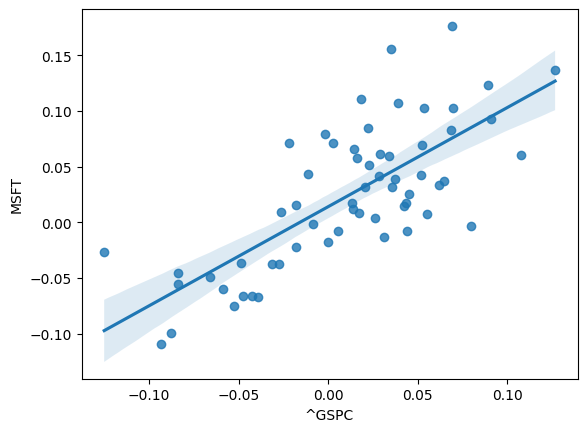

In [59]:
sns.regplot(x="^GSPC",y="MSFT",data=mtl_ret) #,ci=None
plt.show()

## <center> <span style="color:lightblue">Stock Market Analysis </span>

In [60]:
#https://www.youtube.com/watch?v=f2BCmQBCwDs&list=PL-DDW8QIRjNPFm-TSbqmxr_bGzyzVhB95 Playlist
#https://www.youtube.com/watch?v=57qAxRV577c
#https://www.youtube.com/watch?v=IfoZaCGTJ_Q    --------bbands

In [72]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(df,title="try")
# profile.to_notebook_iframe()